In [1]:
# Social Analytics - Andrew Abraham

# Analysis - Three Trends Observed

# 1.)  Sentiments were variable, and often did not align with expectations of the news bureau reputation. 

# 2.)  A lot of tweets were  neutral, which I somewhat expected. 

# 3.)   The scatter plot of compound sentiments was not a very effective tool to gauge general news sentiment. 

In [2]:
# importing of tweepy, pandas, matplotlib, VADER

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import tweepy

import time
import csv

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Retrieve tweets from Twitter accounts of BBC, CBS, CNN, Fox, and New York Times 
# Focus on the international twitter accounts, noting that Fox News does not have a dedicated int'l account. 

targets= ("@bbcworld", "@cbs", "@cnni", "@foxnews", "@nytimesworld")

results_one = []
results_two = []
    
counter = 1


for target in targets:
    oldest_tweet = None
    
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_time = []
    text_all = []

    for x in range(1, 6):
   
        public_tweets = api.user_timeline(target, page=x)

        for tweet in public_tweets: 

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            time_created = tweet["created_at"]

            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            text_all.append(tweet["text"])
            tweet_time.append(time_created)

            oldest_tweet = tweet["id"] - 1
    
        
    results_one.append({
        "Username": target,
        "Text": text_all,
        "Tweet Time Created": tweet_time,
        "Compound Score": compound_list,
        "Postive Score": positive_list,
        "Neutral Score": neutral_list,
        "Negative Score": negative_list
    })

    results_two.append({
        "Username": target,
        "Compound Average": np.mean(compound_list)
    })
   
    counter += 1
        


In [6]:
print(results_one)

[{'Username': '@bbcworld', 'Text': ['RT @BBCTech: Google cars self-drive to Walmart supermarket in trial https://t.co/jrdcOsfyr2', 'RT @BBCSport: Nairo Quintana won stage 17 of the #TDF2018 as Geraint Thomas extended his lead in the yellow jersey.\n\nFull story: https://t.…', 'US pastor Andrew Brunson leaves prison in Turkey https://t.co/XHyjgPeV2Y', 'RT @BBCNorthAmerica: Did you graduate in 2008 in the US? We want to hear from you. We’re looking to speak to people who graduated at the he…', 'Judge releases immigrant detained after pizza delivery https://t.co/hLwv0kmBCm', "RT @BBCBreaking: Scientists believe they've found liquid water on Mars for the first time, a potential game-changer in the search for life…", 'Close shave with Florida police wins homeless man job https://t.co/P8NUEXkLLe', 'Kylie Jenner and David Beckham make Instagram rich list https://t.co/fmUGESx0t7', 'Ryanair pilots to strike for a fourth day https://t.co/nEslZRXgPy', "The 'angels' at play in Pakistan election ht

In [7]:
# Create DataFrame from Results List
resultsone_df = pd.DataFrame(results_one).set_index("Username").round(3)
resultsone_df.head()

,Compound Score,Negative Score,Neutral Score,Postive Score,Text,Tweet Time Created
Username,,,,,,
@bbcworld,"[0.0, 0.5719, -0.5106, 0.0772, -0.4019, 0.0, 0...","[0.0, 0.0, 0.292, 0.0, 0.278, 0.0, 0.0, 0.0, 0...","[1.0, 0.856, 0.708, 0.952, 0.722, 1.0, 0.709, ...","[0.0, 0.144, 0.0, 0.048, 0.0, 0.0, 0.291, 0.28...",[RT @BBCTech: Google cars self-drive to Walmar...,"[Wed Jul 25 15:55:33 +0000 2018, Wed Jul 25 15..."
@cbs,"[0.0, 0.34, -0.1511, 0.8293, 0.128, -0.296, -0...","[0.0, 0.0, 0.099, 0.0, 0.0, 0.109, 0.109, 0.26...","[1.0, 0.882, 0.834, 0.66, 0.927, 0.891, 0.891,...","[0.0, 0.118, 0.068, 0.34, 0.073, 0.0, 0.0, 0.0...","[Renowned artists Cher, Philip Glass, Reba McE...","[Wed Jul 25 15:12:31 +0000 2018, Wed Jul 25 01..."
@cnni,"[0.128, 0.2023, 0.6124, 0.0772, 0.6705, 0.3875...","[0.1, 0.0, 0.0, 0.079, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.779, 0.859, 0.722, 0.83, 0.718, 0.832, 1.0,...","[0.121, 0.141, 0.278, 0.09, 0.282, 0.168, 0.0,...",[Former US President Jimmy Carter says the Uni...,"[Wed Jul 25 16:06:53 +0000 2018, Wed Jul 25 15..."
@foxnews,"[-0.5719, 0.0, 0.0, 0.4215, 0.0, 0.0, 0.34, 0....","[0.236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.764, 1.0, 1.0, 0.811, 1.0, 1.0, 0.806, 1.0,...","[0.0, 0.0, 0.0, 0.189, 0.0, 0.0, 0.194, 0.0, 0...",[.@RealCandaceO: New Study Shows College Campu...,"[Wed Jul 25 16:05:57 +0000 2018, Wed Jul 25 15..."
@nytimesworld,"[-0.4404, 0.0, 0.2247, -0.7269, 0.0516, 0.5719...","[0.218, 0.0, 0.108, 0.243, 0.131, 0.0, 0.108, ...","[0.782, 1.0, 0.739, 0.757, 0.73, 0.709, 0.892,...","[0.0, 0.0, 0.152, 0.0, 0.139, 0.291, 0.0, 0.0,...",[An activist's protest stopped a flight to dep...,"[Wed Jul 25 15:46:06 +0000 2018, Wed Jul 25 15..."


In [8]:
resultstwo_df = pd.DataFrame(results_two).set_index("Username").round(3)
resultstwo_df

,Compound Average
Username,
@bbcworld,-0.157
@cbs,0.241
@cnni,0.018
@foxnews,0.003
@nytimesworld,-0.029


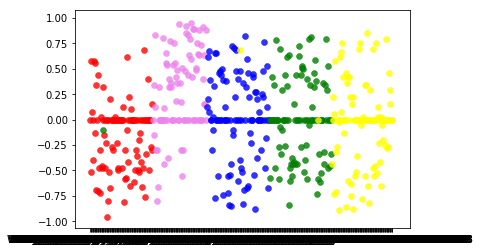

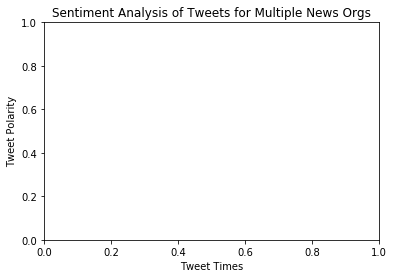

In [18]:
colors = ["red", "violet", "blue", "green", "yellow"] 
z=0

x_vals = resultsone_df["Tweet Time Created"].values.tolist()
y_vals = resultsone_df["Compound Score"].values.tolist()
    
    
for target in targets: 
    
    plt.scatter(x_vals[z],y_vals[z], marker="o", linewidth=0.5, alpha=0.8, c=colors[z])
    
    z=z+1

plt.show()

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweet Times")
plt.title(f"Sentiment Analysis of Tweets for Multiple News Orgs")
plt.savefig('abraham-hw7-plot1.png')


    

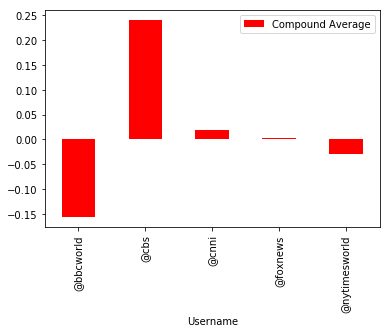

In [19]:
resultstwo_df.plot(kind="bar", facecolor="red")
plt.savefig('abraham-hw7-plot2.png')